<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia


## Differentiation. Finite Differences 01

### About this notebook

In this notebook we use the finite differences scheme to calculate derivatives.

---

### Discretization of a Smooth Function

Consider a smooth function $f(x)$ on a finite interval $[a,b]$. To represent numerically this function, we must divide the interval into a grid with $N-1$ equally spaced intervals or equivalently $N$ points. This is called *discretize* the function. There are many discretization methods (and there are also methods to represent continuous functions without a grid, using instead continuos basis functions such as sines or cosines. These are called *spectral methods*).

Some of the grid-based methods use *structured grids* and include

- Finite-differences
- Finite-volumes
- Finite-elements

All these structured grid methods use cartesian coordinates. *Unstructured grids* use other type of structures such as for example triangular cells or tetrahedra. Using these cells is possible to represent domains with irregular shapes but the treatment is more complicated.

#### Finite Differences Method

The first method that we will use is the Finite Differences, in which we will use a structured cartesian grid. The domain will be discretized into a grid with $N-1$ equally spaced intervals or equivalently $N$ points (nodes). The discrete data representing the function is evaluated at specific points. In the figure below, it can be seen that the points can be the nodes or the middle points at each interval.

<center> <img src="https://i.ibb.co/XZtDysv/Finite-Differences.png" alt="Finite-Differences" border="0">
</center>

These two grids are *equally spaced*, meaning that the space between any pair of consecutive points is the same.

---
For example, consider the $\sin x$ function in the $[0,2\pi]$ interval. We create a grid in the interval and use it to obtain the values of the function and plot. It is clear that depending on the size of the grid we obtain a better representation of the function.

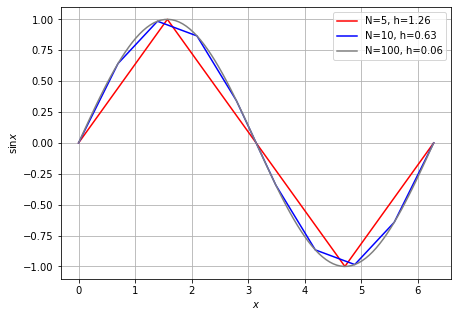

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return np.sin(x)

# Interval
a = 0.
b = 2*np.pi

# Number of points in the grid
N1 = 5 
N2 = 10
N3 = 100

# Grid size
h1 = (b-a)/N1 
h2 = (b-a)/N2 
h3 = (b-a)/N3 

x_grid1= np.linspace(a, b, N1)
x_grid2= np.linspace(a, b, N2)
x_grid3= np.linspace(a, b, N3)

plt.figure(figsize=(7,5))
plt.plot(x_grid1, f(x_grid1),color='red', label=f'N={N1:.0f}, h={h1:.2f}')
plt.plot(x_grid2, f(x_grid2),color='blue', label=f'N={N2:.0f}, h={h2:.2f}')
plt.plot(x_grid3, f(x_grid3),color='grey', label=f'N={N3:.0f}, h={h3:.2f}')

plt.xlabel(r'$x$')
plt.ylabel(r'$\sin x$')
plt.grid()
plt.legend()
plt.show()

---
### Numerical Derivative of an Analytic Function using Finite Difference Approximations

Given an analytic function $f(x)$ we can write its Taylor series expansion around a point $x=x_0$ as

$f(x_0 + \Delta x) = \sum_{n=0}^\infty \frac{f^{(n)} (x_0)}{n!} \Delta x ^n = f(x_0) +
 f'(x_0) \Delta x +f''(x_0) \frac{\Delta x^2}{2}  + f'''(x_0) \frac{\Delta x^3}{6} + ...$
 
Truncation at second order and introducing $h=\Delta x$ gives

$f(x_0 + h) = f(x_0) +  f'(x_0) h+ \mathcal{O}(h^2)$,

from which we obtain a first order forward approximation of the derivative

$f'(x_0) = \frac{f(x_0+h) - f(x_0)}{h} + \mathcal{O}(h)$   : (*Forward Difference Derivative*)

Similarly, it is possible to obtain a first order backward diference estimate for the derivative

$f'(x_0) = \frac{f(x_0) -f(x_0-h)}{h} + \mathcal{O}(h)$   : (*Backward Difference Derivative*)
 
 Combining these relations, we obtain the central difference estimate, which is second order accurate.
 
$f'(x_0) = \frac{f(x_0 + h) -f(x_0-h)}{2h} + \mathcal{O}(h^2)$   : (*Central Difference Derivative*)

In the following plot, we illustrate the three numerical derivatives:

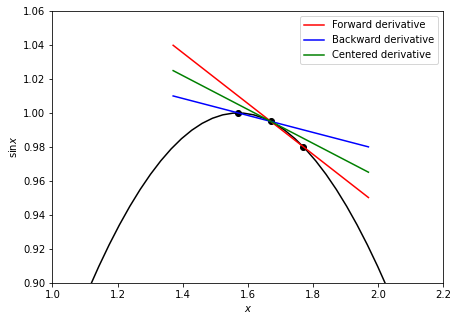

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def forwardDerivative(f, x, h):
    return (f(x + h) - f(x))/h

def backwardDerivative(f, x, h):
    return (f(x) - f(x - h))/h

def centeredDerivative(f, x, h):
    return (f(x + h) - f(x - h))/(2*h)

# To draw a staright line defined by the numerical derivatives
def straight_line(x_0, y_0, m, x):
    y = y_0 + m*(x - x_0)
    return y

# Point to calculate the derivative
x_0 = np.pi/2 +0.1
y_0 = f(x_0)

# Step size in the derivative
h = 0.1

# Points involved in the numerical derivatives
points_x = [x_0-h, x_0, x_0+h]
points_y = [f(x_0-h), y_0, f(x_0+h)]

# Numerical derivatives
f_dfdx = forwardDerivative(f, x_0, h) 
b_dfdx = backwardDerivative(f, x_0, h) 
c_dfdx = centeredDerivative(f, x_0, h)

# x-Ranges to plot function and straight lines
x = np.linspace(0, np.pi, 100)
xline = np.linspace(x_0-0.3, x_0+0.3, 50) 

plt.figure(figsize=(7,5))
plt.plot(x, f(x), 'k')
plt.scatter(points_x, points_y, color='black')
plt.plot(xline, straight_line(x_0, y_0, f_dfdx, xline), 'r', label='Forward derivative')
plt.plot(xline, straight_line(x_0, y_0, b_dfdx, xline), 'b', label='Backward derivative')
plt.plot(xline, straight_line(x_0, y_0, c_dfdx, xline), 'g', label='Centered derivative')

plt.xlim(1.,2.2)
plt.ylim(0.9,1.06)
plt.xlabel(r'$x$')
plt.ylabel(r'$\sin x$')
plt.legend()
plt.show()


One of the common questions using this approximation is, How do we chose the value of $h$? Calculus theory says that we must have $h \rightarrow 0$. However, due to the round-off error and the precision of the machine, this is not a good idea for numerical calculations. 

As an example, consider the $\sin x$ function and its derivative at the point $x=\frac{\pi}{2}$. We will calculate this derivative for some values of $h$

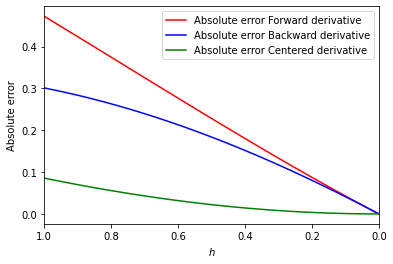

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def dfdx(x):
    return np.cos(x)

def forwardDerivative(f, x, h):
    return (f(x + h) - f(x))/h

def backwardDerivative(f, x, h):
    return (f(x) - f(x - h))/h

def centeredDerivative(f, x, h):
    return (f(x + h) - f(x - h))/(2*h)


x = 1.

h_max = 1 
h_min = 1E-12
h = np.linspace(h_min, h_max, 100)

f_dfdx = forwardDerivative(f, x, h) 
b_dfdx = backwardDerivative(f, x, h) 
c_dfdx = centeredDerivative(f, x, h)

abs_error_f = np.abs(dfdx(x) - f_dfdx)
abs_error_b = np.abs(dfdx(x) - b_dfdx)
abs_error_c = np.abs(dfdx(x) - c_dfdx)

plt.figure()
plt.plot(h, abs_error_f, 'r', label='Absolute error Forward derivative')
plt.plot(h, abs_error_b, 'b', label='Absolute error Backward derivative')
plt.plot(h, abs_error_c, 'g', label='Absolute error Centered derivative')

plt.xlabel(r'$h$')
plt.ylabel(r'Absolute error')
plt.xlim(h_max, h_min)
plt.legend()
plt.show()


It appears that a very small value of $h$ makes that all three derivatives give the correct value. However, a zoom into the small $h$ region shows an interesting behavior. 

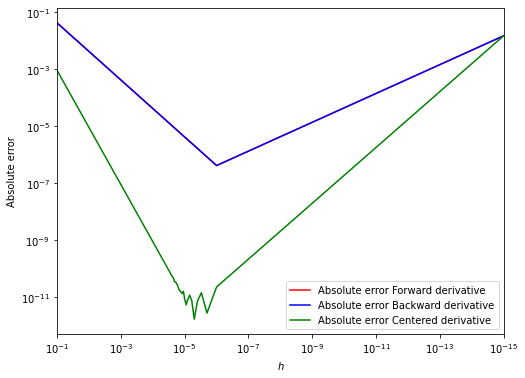

In [11]:
x = 1.

h_max = 1E-1 
h_min = 1E-15
h = np.linspace(h_min, h_max, 100000)

f_dfdx = forwardDerivative(f, x, h) 
b_dfdx = backwardDerivative(f, x, h) 
c_dfdx = centeredDerivative(f, x, h)

abs_error_f = np.abs(dfdx(x) - f_dfdx)
abs_error_b = np.abs(dfdx(x) - b_dfdx)
abs_error_c = np.abs(dfdx(x) - c_dfdx)

plt.figure(figsize=(8,6))
plt.loglog(h, abs_error_f, 'r' ,label='Absolute error Forward derivative')
plt.loglog(h, abs_error_b, 'b', label='Absolute error Backward derivative')
plt.loglog(h, abs_error_c, 'g', label='Absolute error Centered derivative')

plt.xlabel(r'$h$')
plt.ylabel(r'Absolute error')
plt.xlim(h_max, h_min)
plt.legend()
plt.show()

The absolute error of the three numerical derivatives have a minimum. Lets zoom to see the location of the minimum error:

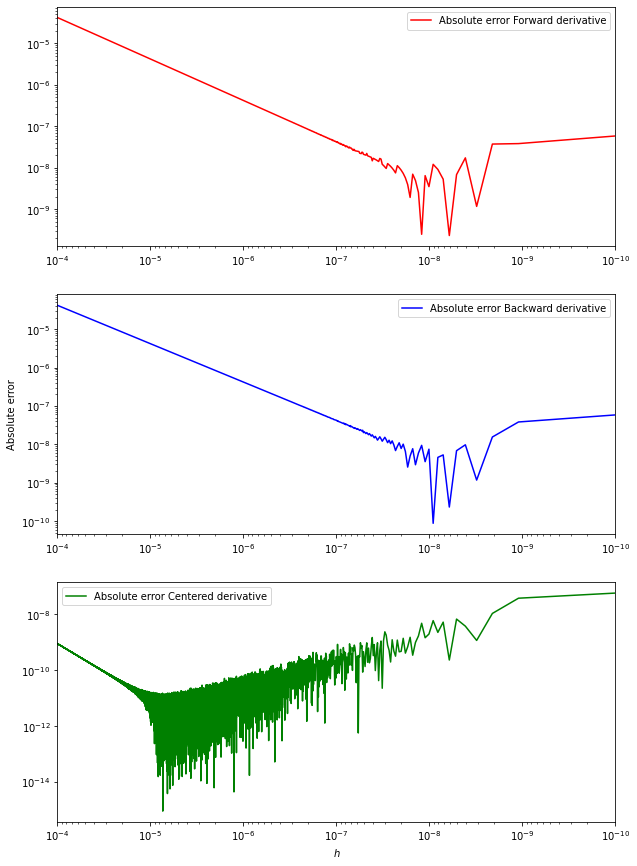

In [13]:
x = 1.

h_max = 1E-4 
h_min = 1E-10
h = np.linspace(h_min, h_max, 100000)

f_dfdx = forwardDerivative(f, x, h) 
b_dfdx = backwardDerivative(f, x, h) 
c_dfdx = centeredDerivative(f, x, h)

abs_error_f = np.abs(dfdx(x) - f_dfdx)
abs_error_b = np.abs(dfdx(x) - b_dfdx)
abs_error_c = np.abs(dfdx(x) - c_dfdx)

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.loglog(h, abs_error_f, color='red', label='Absolute error Forward derivative')
plt.xlim(h_max, h_min)
plt.legend()

plt.subplot(3,1,2)
plt.loglog(h, abs_error_b, color='blue',label='Absolute error Backward derivative')
plt.ylabel(r'Absolute error')
plt.xlim(h_max, h_min)
plt.legend()

plt.subplot(3,1,3)
plt.loglog(h, abs_error_c, color='green', label='Absolute error Centered derivative')
plt.xlim(h_max, h_min)
plt.legend()

plt.xlabel(r'$h$')
plt.xlim(h_max, h_min)
plt.show()

#### Selection of the step size $h$

A rule of thumb to choose the step size in the numerical derivatives is the square root of the machine's epsilon,

$h \sim \sqrt{\epsilon}$

Since we determine $\epsilon \sim 10^{-16}$, we will choose $h\sim 10^{-8}$

---
### Differentiation in an Evenly Spaced Grid

It is usual to use an evenly spaced grid for the finite difference method, i.e. $h =$ constant. Hence, the numerical derivative using forward or backward differences at each point of some interval $[x_1, x_2, ..., x_j, ...,x_n] $ are

$f'(x_i) = \frac{f_{i+1} - f_{i}}{h} + \mathcal{O}(h) $

$f'(x_i) = \frac{f_i - f_{i-1}}{h} + \mathcal{O}(h) $

Note that the forward derivative can not be evaluated at the point $x=x_n$, while the backward derivative cannot be evaluated at the point $x=x_1$. 

On the other hand, the central difference estimate is

$f'(x_i) = \frac{f_{i+1} - f_{i-1}}{2h} + \mathcal{O}(h^2) $

and it is clear that although it is second order accurate, it cannot be evaluated at none of the extremes of the interval.

##### Example
In this example we will calculate the numerical derivative of the $\sin x$ function in some range of the variable $x$.

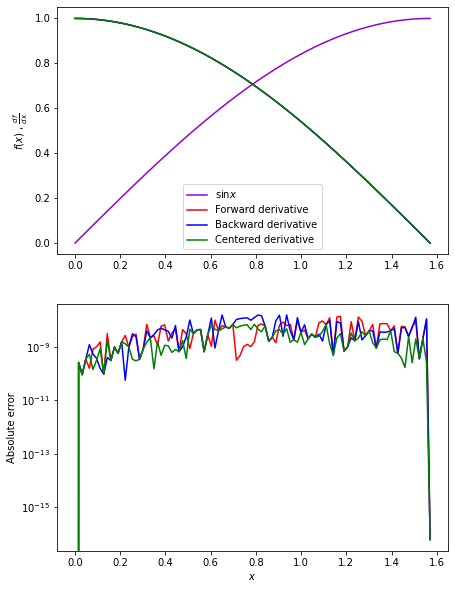

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def dfdx(x):
    return np.cos(x)

def forwardDerivative(f, x, h=1e-8):
    return (f(x + h) - f(x))/h

def backwardDerivative(f, x, h=1e-8):
    return (f(x) - f(x - h))/h

def centeredDerivative(f, x, h=1e-8):
    return (f(x + h) - f(x - h))/(2*h)


x = np.linspace(0, np.pi/2, 100)
function = f(x)
f_dfdx = forwardDerivative(f, x) 
b_dfdx = backwardDerivative(f, x) 
c_dfdx = centeredDerivative(f, x) 

abs_error_f = np.abs(f_dfdx - dfdx(x))
abs_error_b = np.abs(b_dfdx - dfdx(x))
abs_error_c = np.abs(c_dfdx - dfdx(x))

plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
plt.plot(x, function, color='darkviolet', label=r'$\sin x$')
plt.plot(x, f_dfdx, 'r', label=r'Forward derivative')
plt.plot(x, b_dfdx, 'b', label=r'Backward derivative')
plt.plot(x, c_dfdx, 'g', label=r'Centered derivative')
plt.ylabel(r'$f(x)$ , $\frac{df}{dx}$' )
plt.legend()

plt.subplot(2,1,2)
plt.plot(x, abs_error_f, 'r', label=r'Forward derivative')
plt.plot(x, abs_error_b, 'b', label=r'Backward derivative')
plt.plot(x, abs_error_c, 'g', label=r'Centered derivative')
plt.yscale('log')
plt.ylabel(r'Absolute error')

plt.xlabel(r'$x$')
plt.show()


Note that the absolute error in the numerical derivative is never greater than $10^{-8}$

---
### Differentiation in an Unevenly Spaced Grid

In some astrophysical applications, it is needed an unevenly spaced grid to describe the physical system using finite differences. 

The one -ided derivative estimates presented above (forward and backward) are not modified by the unevenly spaced grid because they use only two points and hence, only one interval size, $h$.

However, the centered derivative involves three points and therefore it can use to size intervals. In order to obtain a second-order accurate estimate of the first derivative in an unevenly spaced grid consider the expansions

$f(x_i + h_2) = f(x_i) + f'(x_i)  h_2 + f''(x_i) \frac{h_2^2}{2}  +
\mathcal{O}(h_2^3)$

$f(x_i - h_1) = f(x_i) - f'(x_i)h_1  + f''(x_i) \frac{h_1^2}{2}  +
\mathcal{O}(h_1^3)$,

where $h_1 = x_i - x_{i-1}$ and $h_2 = x_{i+1} - x_{i}$. Substracting these relations to eliminate the second derivative and solving for f'(x_i) we obtain

$f'(x_i) = \frac{h_1}{h_2(h_1+h_2)} f(x_{i+1}) - \frac{h_1 - h_2}{h_2 h_1} f(x_i)
- \frac{h_2}{h_1(h_1 + h_2)} f(x_{i-1})$.

It is clear that this expression reduces to the centered derivative above when $h_1 = h_2$.

---
### Numerical Differentiation of a Discretely-Sampled Function

Now, we will implement a numerical derivative algorithm for a discretely-sampled function given by a .txt data file.

In [16]:
path=''

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
path = '/content/drive/MyDrive/Colab Notebooks/CA2021/13. Errors and Differentiation/presentation/'

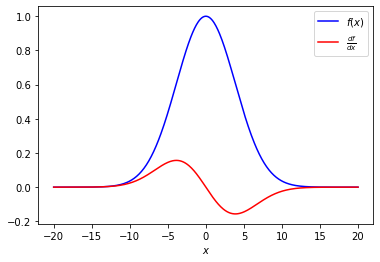

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def Derivative(x, f):
    '''
    ------------------------------------------
    This function returns the numerical 
    derivative of a discretely-sample function 
    using one-side derivatives in the extreme 
    points of the interval and second order 
    accurate derivative in the middle points.
    The data points may be evenly or unevenly
    spaced.
    ------------------------------------------
    '''
    # Number of points
    N = len(x)
    dfdx = np.zeros([N, 2])
    dfdx[:,0] = x
    
    # Derivative at the extreme points
    dfdx[0,1] = (f[1] - f[0])/(x[1] - x[0])
    dfdx[N-1,1] = (f[N-1] - f[N-2])/(x[N-1] - x[N-2])
    
    #Derivative at the middle points
    for i in range(1,N-1):
        h1 = x[i] - x[i-1]
        h2 = x[i+1] - x[i]
        dfdx[i,1] = h1*f[i+1]/(h2*(h1+h2)) - (h1-h2)*f[i]/(h1*h2) -\
                    h2*f[i-1]/(h1*(h1+h2))
    
    return dfdx

# Loading the data
data = np.loadtxt(path+'function_data.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

# Calling the derivative function
dfdx_data = Derivative(x,f)

plt.plot(x, f, 'b', label=r'$f(x)$')
plt.plot(dfdx_data[:,0], dfdx_data[:,1], 'r', label=r'$\frac{df}{dx}$')
plt.xlabel(r'$x$')
plt.legend()
plt.show()


---
### Convergence of a Numerical Method

#### 1. When the analytical solution is known. 

If some astrophysical problem has a known analytical solution $Y(x)$ and an algorithm gives the numerical solution $y(x;h)$, it is said that the numerical method is **convergent** if

$\lim_{h\rightarrow 0} y(x;h) = Y(x)$.

Following the description given in the truncation error lecture, we will introduce a method to measure the convergence of a numerical method by defining the **convergence factor**, $C$, as

$C = \frac{\left| y(x:h_2) - Y(x) \right|}{\left| y(x:h_1) - Y(x) \right|} \equiv \left(\frac{h_2}{h_1} \right)^n$

where we have chosen two discretization step sizes $h_2 < h_1$. When $C<1$ the numerical procedure converges and, due to the last identification, the number $n$ gives the order of accuracy of the method.

For example, if we take $\frac{h_2}{h_1} = 10^{-1}$, we obtain

$C \equiv \left(\frac{h_2}{h_1} \right)^n = (10^{-1})^n = 10^{-n}$

and therefore, the order of accuracy is $n=-\log_{10} C$.

##### Example

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def dfdx(x):
    return np.cos(x)

def forwardDerivative(f, x, h=1e-8):
    return (f(x + h) - f(x))/h

def centeredDerivative(f, x, h=1e-8):
    return (f(x + h) - f(x - h))/(2*h)

x_0 = 1.
h1 = 1E-3
h2 = 1E-4

# Forward Derivative Convergence Test
y_1 = forwardDerivative(f, x_0, h1)
y_2 = forwardDerivative(f, x_0, h2)

C_forward = np.abs(y_2 - dfdx(x_0))/np.abs(y_1 - dfdx(x_0))

print('For the forward derivative:')
print(f'For h1 = {h1:.1e} and h2 = {h2:.1e}' )
print(f'the convergence factor is C = {C_forward:.2f}')
print(f'which gives n = {-np.log10(C_forward):.1f}')


# Centered Derivative Convergence Test
y_1 = centeredDerivative(f, x_0, h1)
y_2 = centeredDerivative(f, x_0, h2)

C_centered = np.abs(y_2 - dfdx(x_0))/np.abs(y_1 - dfdx(x_0))

print('')
print('For the centered derivative:')
print(f'For h1 = {h1:.1e} and h2 = {h2:.1e}' )
print(f'the convergence factor is C = {C_centered:.2f}')
print(f'which gives n = {-np.log10(C_centered):.1f}')

For the forward derivative:
For h1 = 1.0e-03 and h2 = 1.0e-04
the convergence factor is C = 0.10
which gives n = 1.0

For the centered derivative:
For h1 = 1.0e-03 and h2 = 1.0e-04
the convergence factor is C = 0.01
which gives n = 2.0


#### 2. When the analytical solution is NOT known. 

If many cases, the analytical solution $Y(x)$ is NOT known. Then, how can we test the convergence of the numerical method? 
In these cases we introduce three discretization step sizes $h_3 < h_2 < h_1$, and define the **self-convergence factor**, $C_{self}$, as

$C_{self} = \frac{\left| y(x:h_3) - y(x:h_2) \right|}{\left| y(x:h_2) - y(x:h_1) \right|} \equiv \frac{h_3^n - h_2^n}{h_2^n - h_1^n}. $

For example, if we take $\frac{h_3}{h_2} = \frac{h_2}{h_1} = 10^{-1}$ , we obtain 

$C_{self} \equiv \frac{10^{-n} h_2^n - h_2^n}{10^{-n}h_1^n - h_1^n} = \frac{(10^{-n}-1) h_2^n }{(10^{-n}-1)h_1^n } = \left( \frac{h_2}{h_1} \right)^n = (10^{-1})^n = 10^{-n}$

and therefore, the order of accuracy is $n=-\log_{10} C$.

##### Example

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def forwardDerivative(f, x, h=1e-8):
    return (f(x + h) - f(x))/h

def centeredDerivative(f, x, h=1e-8):
    return (f(x + h) - f(x - h))/(2*h)

x_0 = 1.
h1 = 1E-2
h2 = 1E-3
h3 = 1E-4

# Forward Derivative Convergence Test
y_1 = forwardDerivative(f, x_0, h1)
y_2 = forwardDerivative(f, x_0, h2)
y_3 = forwardDerivative(f, x_0, h3)

C_self = np.abs(y_3 - y_2)/np.abs(y_2 - y_1)

print('For the forward derivative:')
print(f'For h1 = {h1:.1e}, h2 = {h2:.1e} and h3 = {h3:.1e}' )
print(f'the convergence factor is C = {C_self:.2f}')
print(f'which gives n = {-np.log10(C_self):.1f}')


# Centered Derivative Convergence Test
y_1 = centeredDerivative(f, x_0, h1)
y_2 = centeredDerivative(f, x_0, h2)
y_3 = centeredDerivative(f, x_0, h3)

C_self = np.abs(y_3 - y_2)/np.abs(y_2 - y_1)

print('')
print('For the centered derivative:')
print(f'For h1 = {h1:.1e}, h2 = {h2:.1e} and h3 = {h3:.1e}' )
print(f'the convergence factor is C = {C_self:.2f}')
print(f'which gives n = {-np.log10(C_self):.1f}')

For the forward derivative:
For h1 = 1.0e-02, h2 = 1.0e-03 and h3 = 1.0e-04
the convergence factor is C = 0.10
which gives n = 1.0

For the centered derivative:
For h1 = 1.0e-02, h2 = 1.0e-03 and h3 = 1.0e-04
the convergence factor is C = 0.01
which gives n = 2.0
